#Finite Differece Code for Hele-Shaw Cell aka. Poiseuille Flow in 2D

## Importing Libraries

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *

## Parameters

Assuming the incompressible Navier-Stokes Equation:
$${\partial u_x\over \partial t}=-{1\over \rho}{\partial p\over \partial x}+\nu{\partial^2 u_x \over \partial y^2},$$
we know from the nature of the problem that ${\partial p \over \partial x}={\Delta p\over L}$. Namely the above becomes:
$${\partial u_x\over \partial t}=-{1\over \rho}{\Delta p\over L}+\nu{\partial^2 u_x \over \partial y^2}.$$
Where we define the above parameters below. For simplicity let 
$$\xi={1\over \rho}{\Delta p\over L} $$
such that
$${\partial u_x\over \partial t}=-\xi+\nu{\partial^2 u_x \over \partial y^2}.$$

In [40]:
rho= 1000 #[kg/m^3]
deltaP=100000 #[Pa]
L=15 #length of tube in [m], assuming that the flow is 1D, though
nu= 1 # [m^2/s]
D=2 # upward dimension of tube, analogous to diameter of circular tube
deltaT= 0.5 # time step in [s]
lengthT=60 #duration of time in [s]
deltaY= 0.01 # [m], discretization in space
u0=0; #[m/s] BC at bottom face, no slip
uD=0; #[m/s] BC at top face, no slip
def uI(y,D): return y*(D-y) # initial condition function in [m/s]
xi=(1.0/rho)*(deltaP/L) # parameter for the first term of the diff eq

## Finite Difference Code Implementation

Here we iplement a finite difference code for the above equations with the above parameters.

The code is implemented using a center difference discretization in space. 

In [51]:
#calculating using finite difference
y=np.linspace(-D,D,2*D/deltaY)
t=np.linspace(0,lengthT,lengthT/deltaT)
A=np.zeros((len(y),len(y)))
for ii in range(0,len(y)):
    A[ii,ii]=2
    if ii!=0:
        A[ii,ii-1]=-1
        A[ii-1,ii]=-1
A=A*(deltaY**-2)*nu
ff=np.ones((len(y)))*xi
u=np.linalg.solve(A,ff)


In [52]:
#Calculating the analytical values
u_comp=(deltaP/(2*nu*rho*L))*(D**2-y**2)

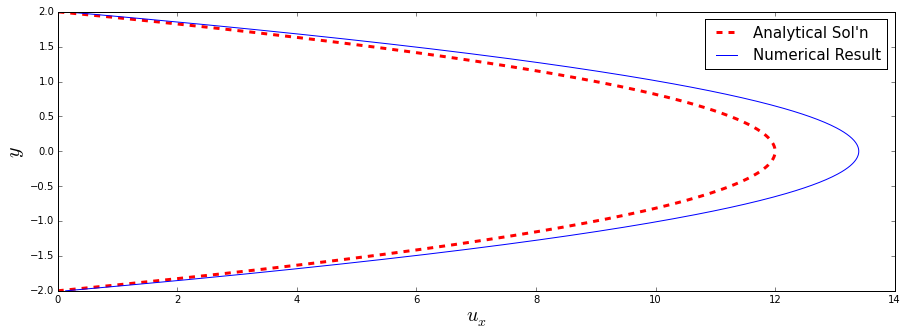

In [53]:
fig = plt.figure(figsize=(15,5))
plt.plot(u_comp,y,'--r',label='Analytical Sol\'n',linewidth=3)
plt.plot(u,y,label='Numerical Result')
plt.xlabel('$u_x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [44]:
print A

[[ 20000. -10000.      0. ...,      0.      0.      0.]
 [-10000.  20000. -10000. ...,      0.      0.      0.]
 [     0. -10000.  20000. ...,      0.      0.      0.]
 ..., 
 [     0.      0.      0. ...,  20000. -10000.      0.]
 [     0.      0.      0. ..., -10000.  20000. -10000.]
 [     0.      0.      0. ...,      0. -10000.  20000.]]
